In [1]:
from scipy.io import netcdf
import numpy as np
import matplotlib.pyplot as plt

In [19]:
##Topological data
socal = netcdf.NetCDFFile('/home/msit/Desktop/southern_calif_crm_v1.nc')
temp = socal.variables.keys()
xog = socal.variables['x'][:]
yog = socal.variables['y'][:]
zog = socal.variables['z'][:]

xfilter = np.argwhere((xog <= -117.343) & (xog >= -117.434))
xclip = xog[xfilter].flatten()

yfilter = np.argwhere((yog >= 32.66) & (yog<= 32.838))
yclip = yog[yfilter].flatten()

print (xclip.shape)
print (yclip.shape)
x, y = np.meshgrid(xclip, yclip)


z = zog[792:1006, 10280:10389].flatten()

print (z)

(109,)
(214,)
[-164.7 -164.8 -164.8 ...  -91.7  -91.7  -91.2]


In [2]:
##hydrodynamic current
file2read = netcdf.NetCDFFile('/home/msit/Desktop/ca_subCA_das_2020010615.nc')
temp = file2read.variables.keys()
print (temp)

u = file2read.variables['u']
v = file2read.variables['v']
print ("u shape: ", u.shape)
print ("v.shape: ", v.shape)

depth = file2read.variables['depth']
print (depth[:])
print (depth.shape)
print (depth.units)

lon = file2read.variables['lon']
lon = lon[:]-360
lat = file2read.variables['lat']

print (lon.shape)
print (lat.shape)

print ("Lat: degrees_north")
print ("lat min: ", min(lat))
print ("lat max: ", max(lat))
print ("Lon: degrees_east")
print ("lon min: ", min(lon))
print ("lon max: ", max(lon))

zeta = file2read.variables['zeta']
print (zeta.shape)
print (zeta.units)


print ("lat: 33, lon: -118.97")
print (lat[59])
print (lon[-68])
print (u[:, :, 59, -68])


file2read.close()

odict_keys(['time', 'depth', 'lat', 'lon', 'temp', 'salt', 'u', 'v', 'zeta'])
u shape:  (1, 14, 391, 351)
v.shape:  (1, 14, 391, 351)
[   0.   10.   20.   30.   40.   50.   75.  100.  150.  200.  300.  400.
  500. 1000.]
(14,)
b'meters from the sea surface'
(351,)
(391,)
Lat: degrees_north
lat min:  31.3
lat max:  43.0
Lon: degrees_east
lon min:  -127.5
lon max:  -117.0
(1, 391, 351)
b'm'
lat: 33, lon: -118.97
33.07
-119.009995
[[-0.17186584 -0.16109857 -0.12371521 -0.10685652 -0.10922217 -0.10114659
  -0.08725957 -0.08366048 -0.08780756 -0.09313001 -0.10319324 -0.08898781
  -0.06192258 -0.13343947]]


/home/msit/anaconda3/lib/python3.7/site-packages/scipy/io/netcdf.py:317: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [5]:
lat1 = lat[np.random.randint(0, 391)]
lon1 = lon[np.random.randint(0, 351)]
lat2 = lat[np.random.randint(0, 391)]
lon2 = lon[np.random.randint(0, 351)]

print (lat1, lon1, lat2, lon2)

calc_dist_lat_lon(lat1, lon1, lat2, lon2)

z = np.zeros((1,5,2))
np.squeeze(z).shape


print (lat[180])
print (lon[-30:-3])
u[0, 0, 180,:]

41.62 -117.3 33.879997 -117.21001
36.7
[-117.869995 -117.84     -117.81     -117.78     -117.75     -117.72
 -117.69     -117.66     -117.630005 -117.600006 -117.57001  -117.53999
 -117.509995 -117.479996 -117.45     -117.42     -117.39     -117.36
 -117.33     -117.3      -117.270004 -117.240005 -117.21001  -117.17999
 -117.149994 -117.119995 -117.09    ]


array([ 2.9585129e-01,  2.9411536e-01,  2.9405975e-01,  2.8846020e-01,
        2.8534886e-01,  2.8649050e-01,  2.8284010e-01,  2.7739868e-01,
        2.6295322e-01,  2.4752621e-01,  2.2984876e-01,  2.1155052e-01,
        1.9160371e-01,  1.7449220e-01,  1.5753774e-01,  1.3811687e-01,
        1.1178114e-01,  8.3944492e-02,  6.4401262e-02,  4.7788240e-02,
        4.0735073e-02,  3.9557654e-02,  4.1851941e-02,  4.3363638e-02,
        4.1723218e-02,  3.7794609e-02,  2.6369708e-02,  1.6018569e-02,
        8.5954405e-03,  2.9608812e-03, -4.1669104e-03, -8.5339947e-03,
       -1.5344685e-02, -1.8125270e-02, -2.4361007e-02, -3.8469598e-02,
       -5.8269054e-02, -7.4890830e-02, -8.4764615e-02, -9.1984652e-02,
       -1.0266985e-01, -1.2398334e-01, -1.3363194e-01, -1.4015412e-01,
       -1.4186609e-01, -1.5850152e-01, -1.8105969e-01, -1.9683215e-01,
       -2.1584801e-01, -2.2206266e-01, -2.3098132e-01, -2.3431540e-01,
       -2.3714203e-01, -2.4487959e-01, -2.4507533e-01, -2.5349745e-01,
      

In [7]:
lat1 = lat[200]
lat2 = lat[201]
lon1 = lon[200]
lon2 = lon[201]

print ("distance between lon: ", calc_dist_lat_lon(lat1, lon1, lat1, lon2), " km")
print ("distance between lat: ", calc_dist_lat_lon(lat1, lon1, lat2, lon1), " km")


distance between lon:  2.653418503856158  km
distance between lat:  3.336026370525359  km


In [4]:
from haversine_dist import calc_dist_lat_lon
def get_total_area(loc1, loc2, loc3, loc4):
    '''
      loc1-4 should be the bbox of interest. Should go clockwise starting from top left
      loc1 = top left
      loc2 = top right
      loc3 = bottom right
      loc4 = bottom left
    '''
    
    [lat1, lon1] = loc1
    [lat2, lon2] = loc2
    [lat3, lon3] = loc3
    [lat4, lon4] = loc4
    
    ##Calculate the haversine dist between all the points:
    ##loc1 to loc2 (width)
    width = calc_dist_lat_lon(lat1, lon1, lat2, lon2)
    ##loc2 to loc 3 (height)
    height = calc_dist_lat_lon(lat2, lon2, lat3, lon3)
    
    print ("width (km): ", width)
    print ("height (km) ", height)
    
    total_area = height*width
    print ("total area in km: ", total_area)
    
    ##5 knots = 9.26 km/hr
    
    total_search_days = total_area/(9.26*24)
    total_search_hours = total_area/9.26
    
    print (total_area/(9.26*24) % 24)
    print ("total search time (days): ", total_search_days)
    print ("total search time (hours): ", total_search_hours)

In [121]:
lajolla = [32.838, -117.343]
lajolla_10 = [32.838, -117.443]
coronado = [32.66, -117.343]
coronado_10 = [32.66, -117.443]
get_total_area(lajolla_10, lajolla, coronado, coronado_10)

width (km):  9.342676827448935
height (km)  19.792696942732203
total area in km:  184.91677107958353
total search time (days):  0.8320589051457141
total search time (hours):  19.96941372349714


In [23]:
lajolla = [32.838, -117.343]
lajolla_20 = [32.838, -117.543]
coronado = [32.66, -117.343]
coronado_20 = [32.66, -117.543]
get_total_area(lajolla_20, lajolla, coronado, coronado_20)

width (km):  18.68535156275856
height (km)  19.792696942732203
total area in km:  369.8335007500877
total search time (days):  1.6641176239654774
total search time (hours):  39.938822975171455


In [136]:
santamonica = [33.982, -118.5617]
oxnard = [33.982, -119.187]
longbeach = [33.697, -118.5617]
longbeach_100 = [33.697, -119.187]
get_total_area(oxnard, santamonica, longbeach, longbeach_100)

width (km):  57.65526049907495
height (km)  31.690554093698683
total area in km:  1827.1271516322236
8.22141446918747
total search time (days):  8.22141446918747
total search time (hours):  197.3139472604993


In [9]:
##Find the exact lat/lon values from the graph
np.sort(np.where(lon[:] <= -121))

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [ ]:
##Visualize the current maps

depth = 0
U = np.squeeze(u[:, depth, :, :])
V = np.squeeze(v[:, depth, :, :])
X, Y = np.meshgrid(np.arange(min(lon)-5, max(lon)+10, .03), np.arange(min(lat)-5, max(lat)+10, .03))

fig3, ax3 = plt.subplots(figsize=(30,20))
current_vector = np.hypot(U, V)
Q = ax3.quiver(X,Y,U,V, width=10, scale=100)

# Q = ax3.quiver(X, Y, U, V, current_vector, units='x', pivot='tip', width=0.022, scale=0.01)
# qk = ax3.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E', coordinates='figure')
# ax3.scatter(X, Y)

plt.show()

In [150]:
##Visualize the current maps

##get bbox
##get those coordiantes from the netcdf file at all depths
##Filter out the currents that are greater than 9999999
##visualize those currents at each depth

def visualize_currents(loc1, loc2, loc3, loc4, visualize=True):
    min_lat = min(loc1[0], loc2[0], loc3[0], loc4[0])
    max_lat = max(loc1[0], loc2[0], loc3[0], loc4[0])
    min_lon = min(loc1[1], loc2[1], loc3[1], loc4[1])
    max_lon = max(loc1[1], loc2[1], loc3[1], loc4[1])
    
    print (max_lat)
    print (min_lat)
    
    ##get the idx values from lat, lon arrays
    lon_idx = np.where((lon[:]>=min_lon) & (lon[:]<=max_lon))
    lat_idx = np.where((lat[:]>=min_lat) & (lat[:]<=max_lat))
    
    ##Use those idx values to get depth values from u and v
    ##U and V are read-only(?). Hence, copy the values
    u_area = u[0, :, lat_idx[0][0]:lat_idx[0][-1], lon_idx[0][0]:lon_idx[0][-1]].copy()
    v_area = v[0, :, lat_idx[0][0]:lat_idx[0][-1], lon_idx[0][0]:lon_idx[0][-1]].copy()
    
    ##Filter out the currents that are greater than -9999:
    neg_values = u_area<-500
    u_area[neg_values] = 0.0
    v_area[neg_values] = 0.0
    
    ##make into vector
    uv_area = np.hypot(u_area, v_area)
    print (uv_area.shape)
    
    print (depth.shape)
    
    ##Visualize
    ##lat is the y-axis, lon is the x-axis
    if visualize == True:
        for d in range(depth.shape[0]):
            u_slice = u_area[d,:,:]
            v_slice = v_area[d,:,:]

            X,Y = np.meshgrid(np.arange(min_lon, max_lon, (max_lat-min_lat)/v_slice.shape[1]),
                              np.arange(min_lat, max_lat, (max_lat-min_lat)/u_slice.shape[0]))

            fig1, ax1 = plt.subplots(figsize=(10,10))
            ax1.set_title("Current vector field at depth={0}".format(depth[d]))
            ax1.quiver(X,Y, u_slice, v_slice, uv_area[d,:,:])
            ax1.scatter(X,Y, color='b', s=15)
            ax1.set_xlim([min_lon-0.1, max_lon+0.05])
            ax1.set_ylim([min_lat-0.1, max_lat+0.05])

#     return u_area, v_area, uv_area

32.838
32.66
(14, 5, 6)
(14,)


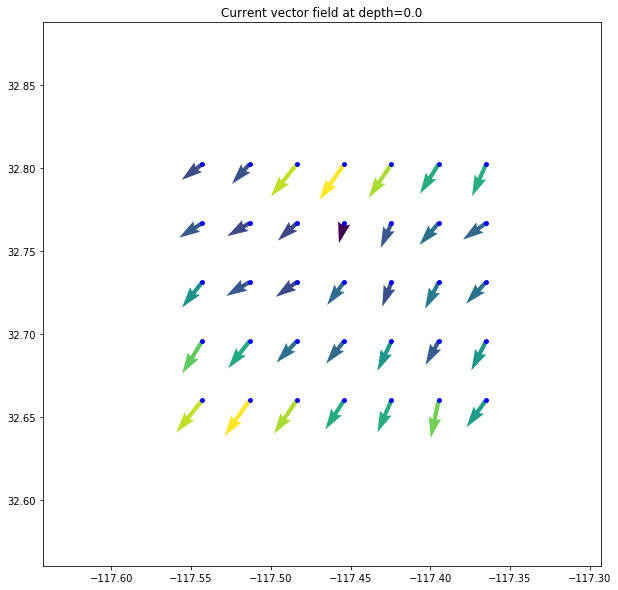

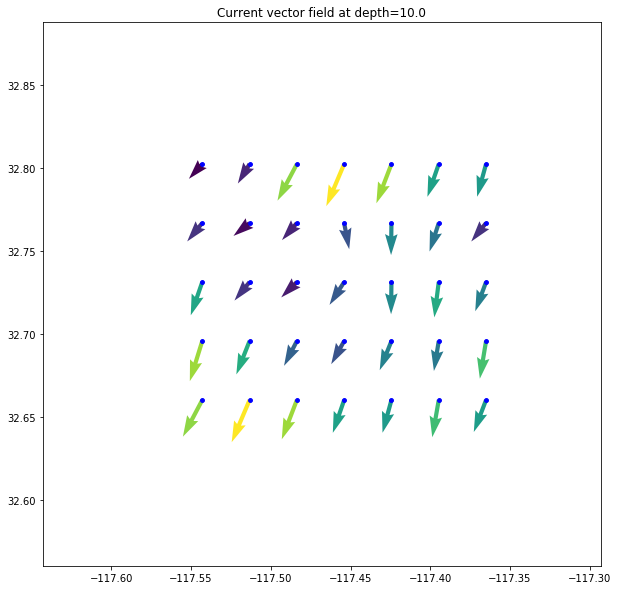

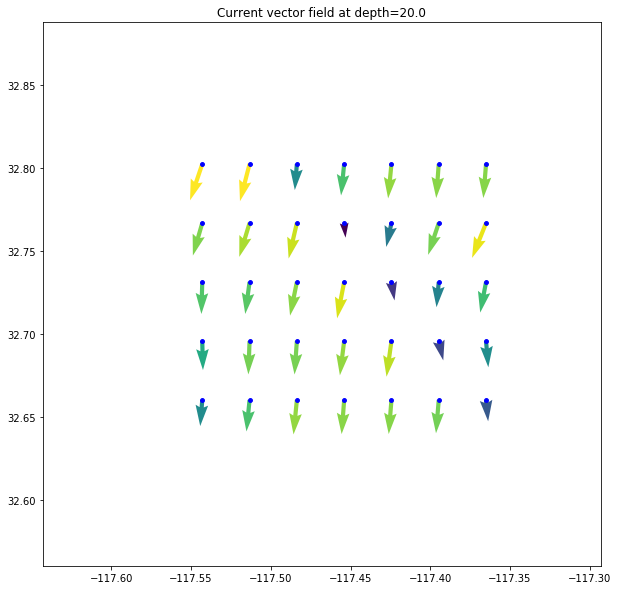

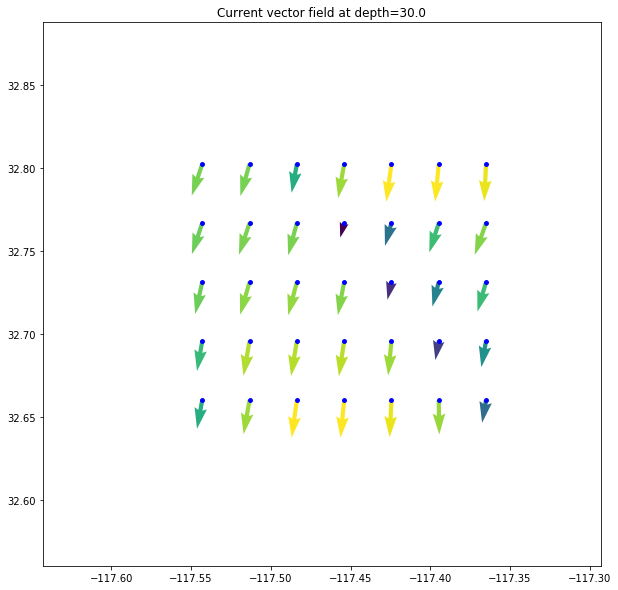

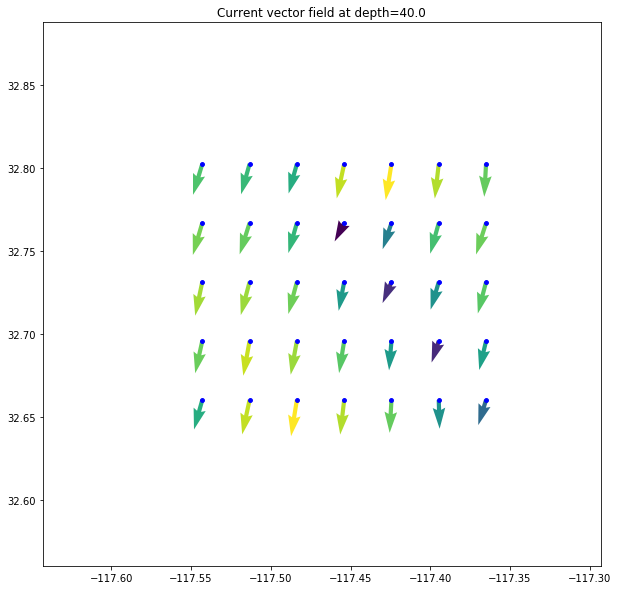

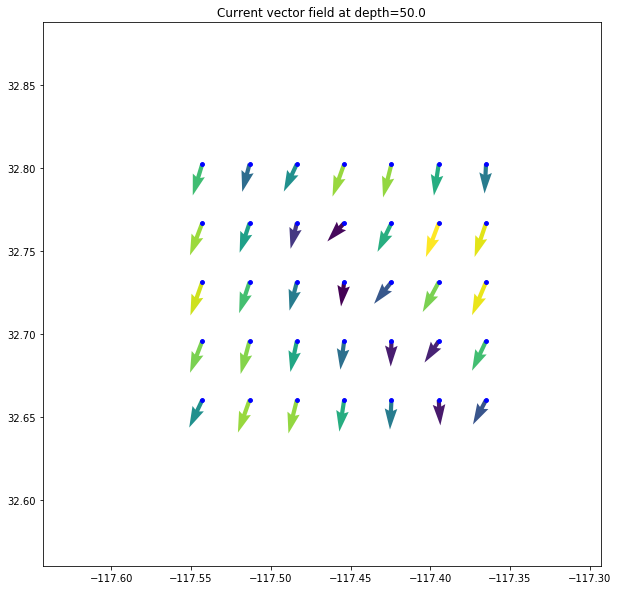

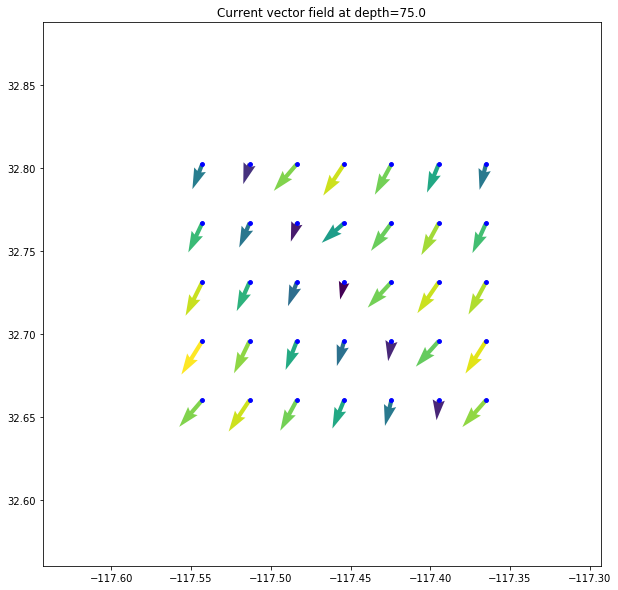

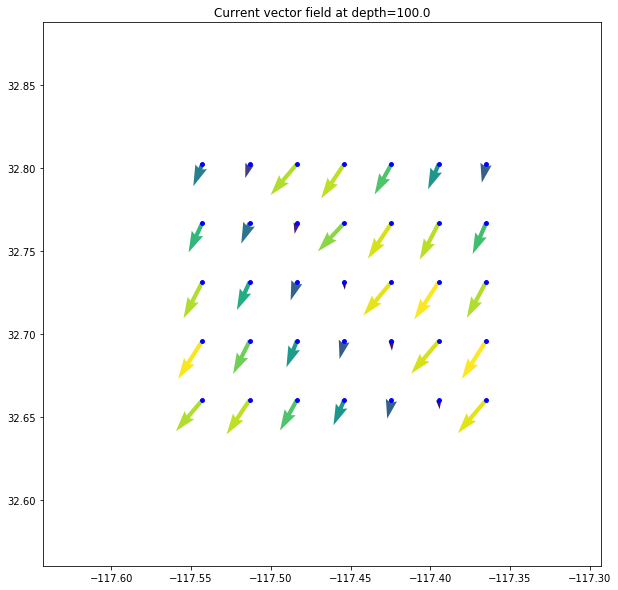

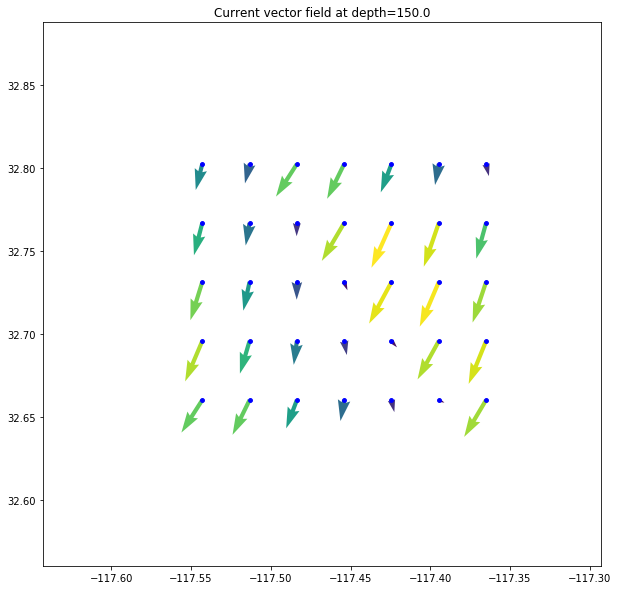

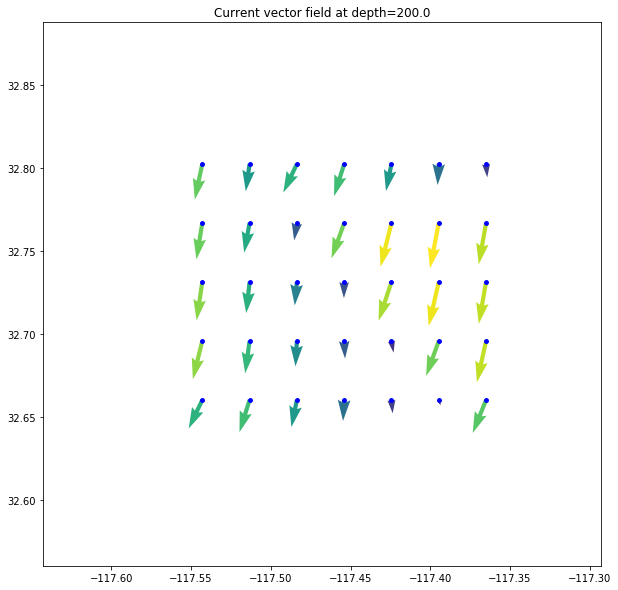

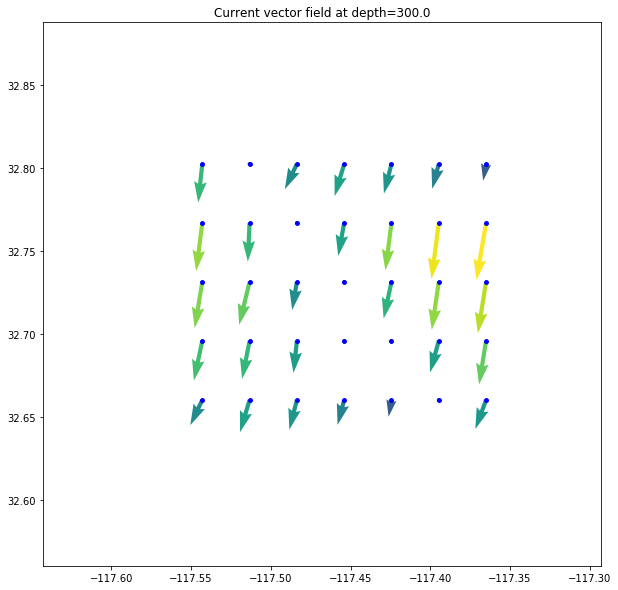

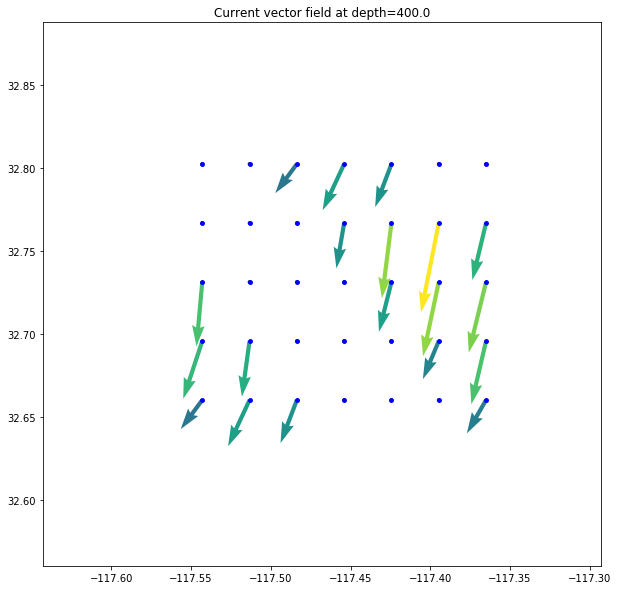

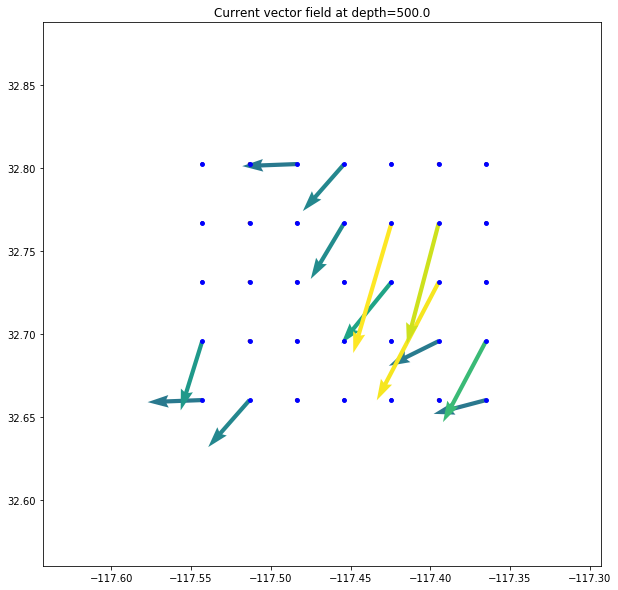

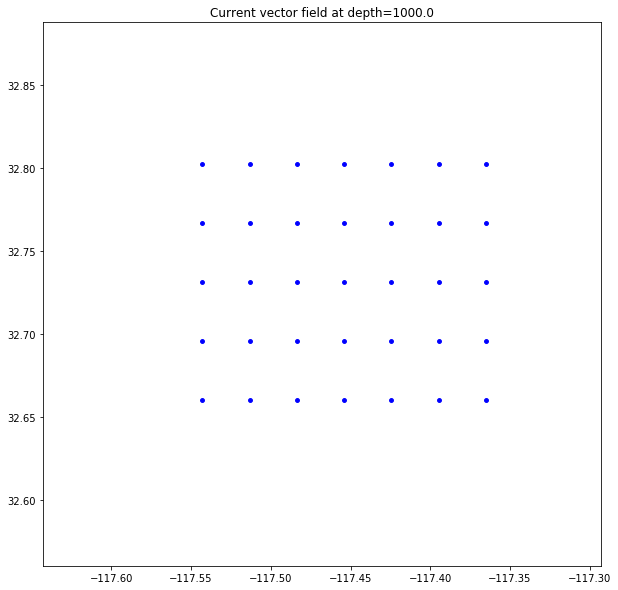

In [152]:
visualize_currents(lajolla_20, lajolla, coronado, coronado_20)

33.982
33.697
(14, 9, 19)
(14,)


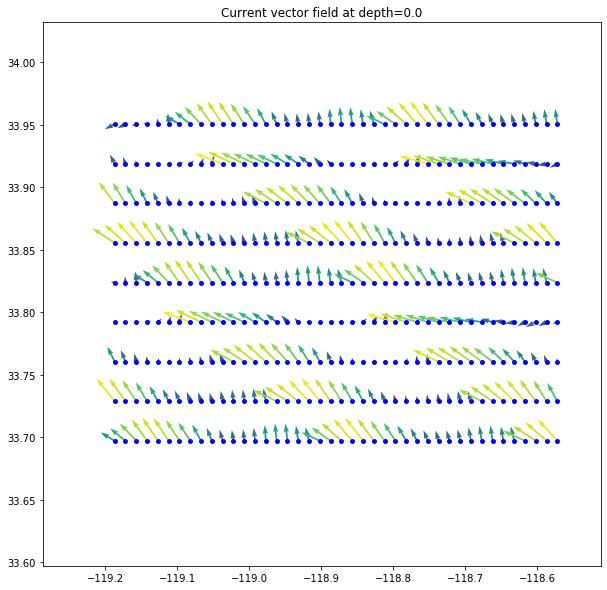

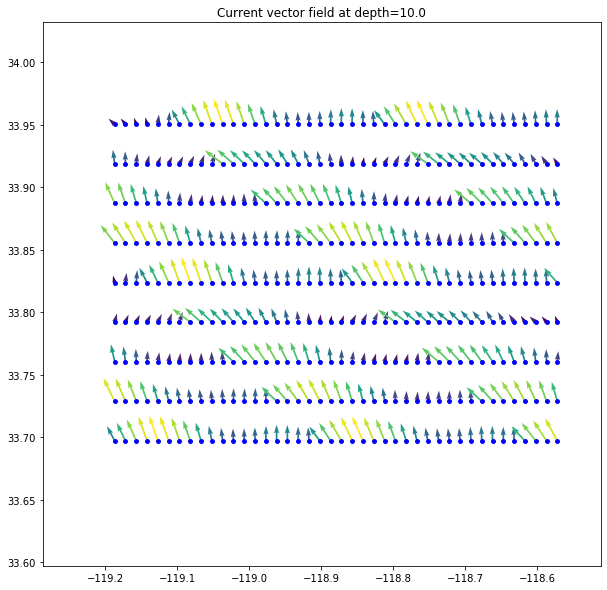

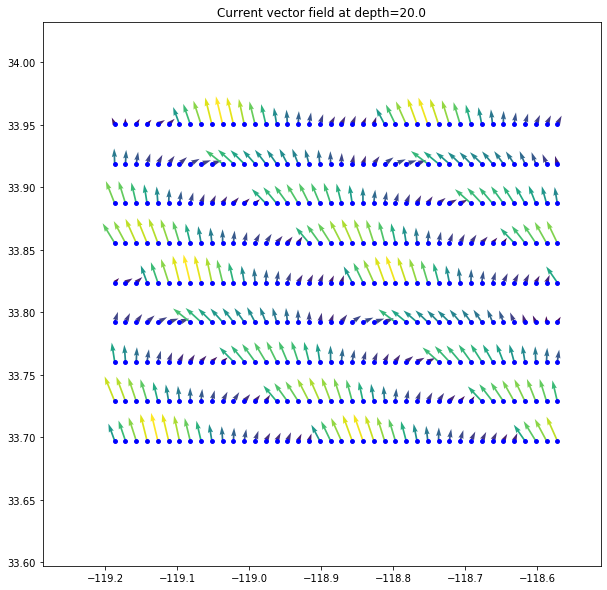

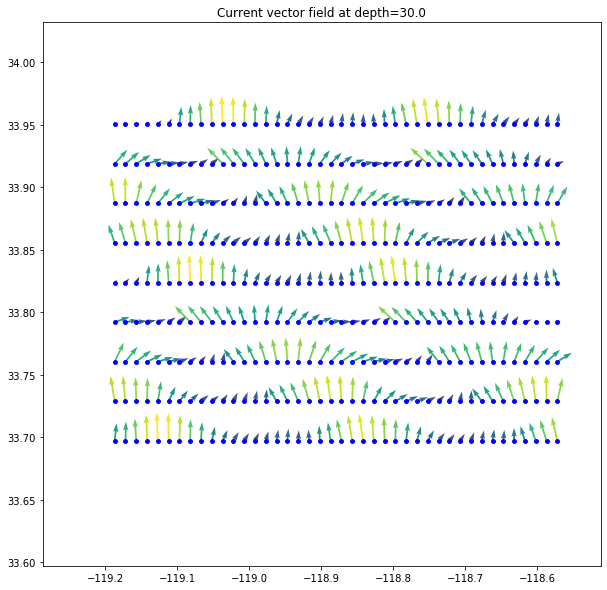

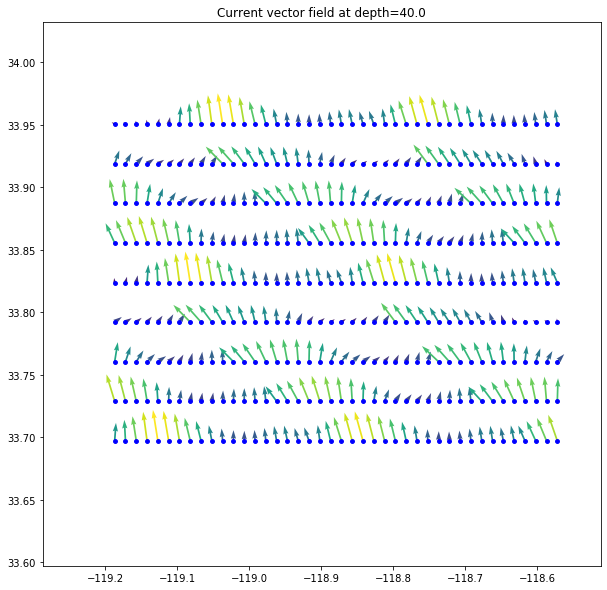

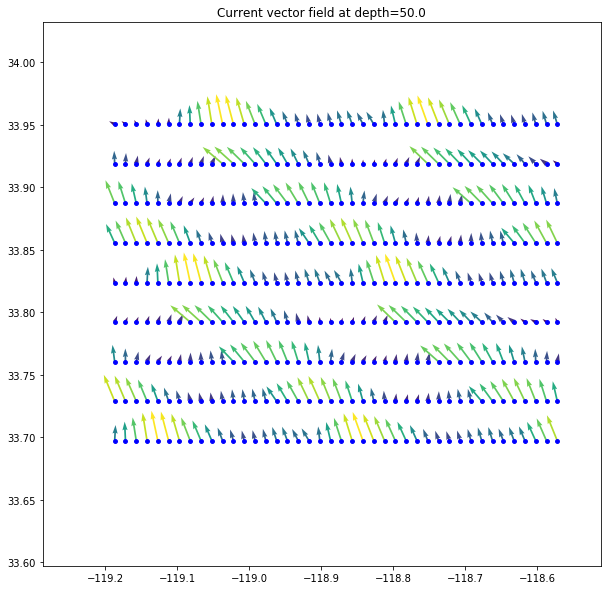

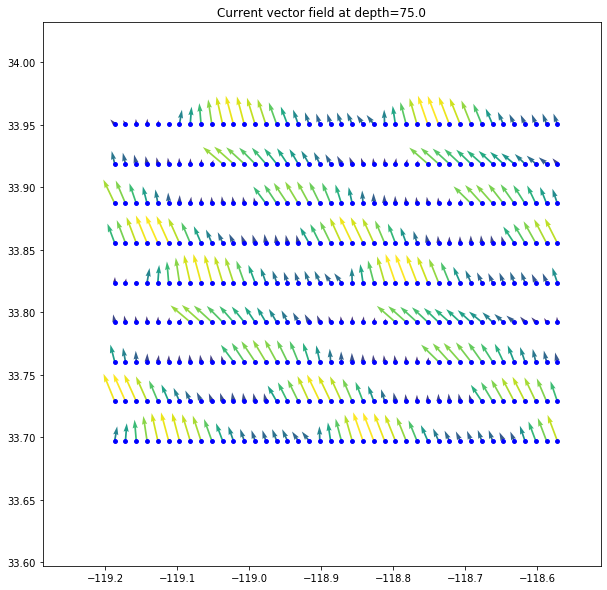

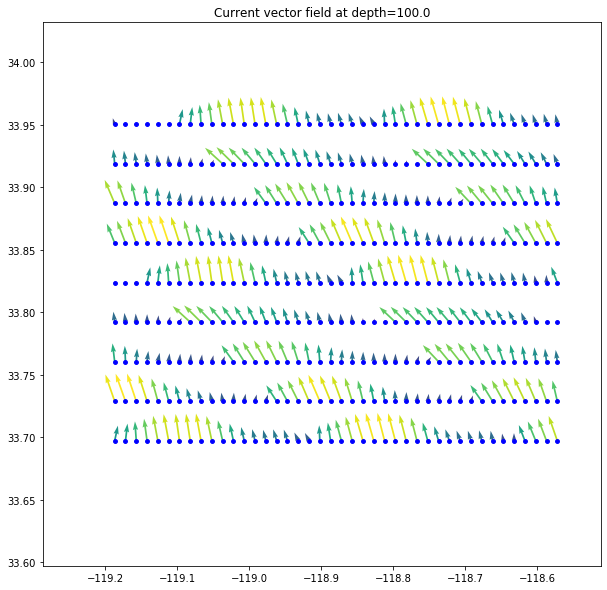

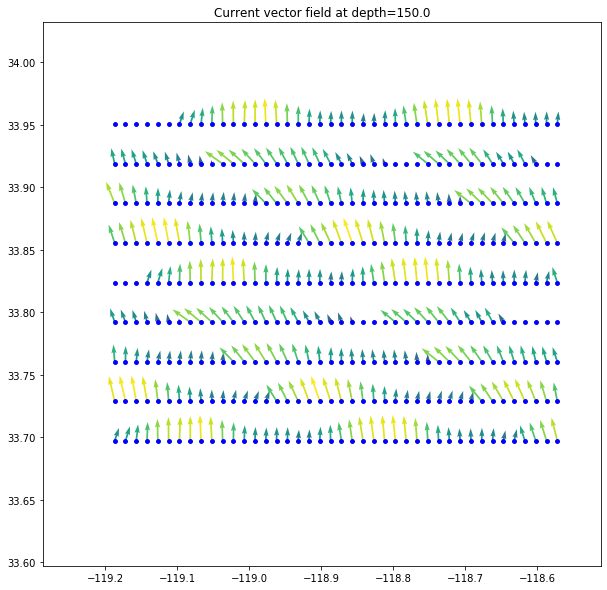

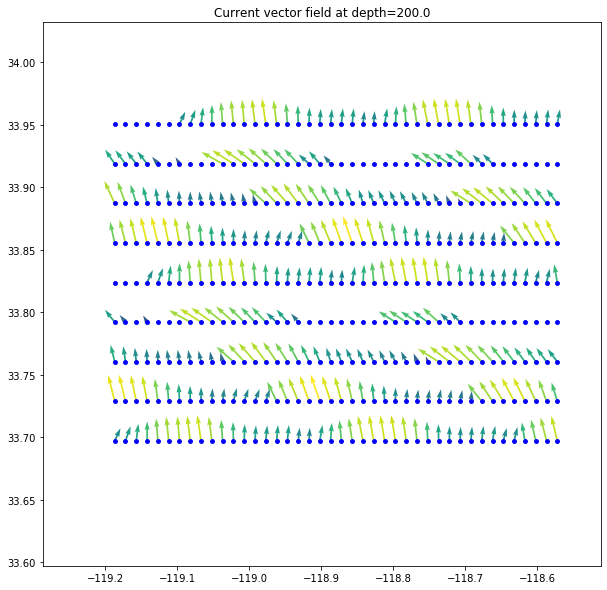

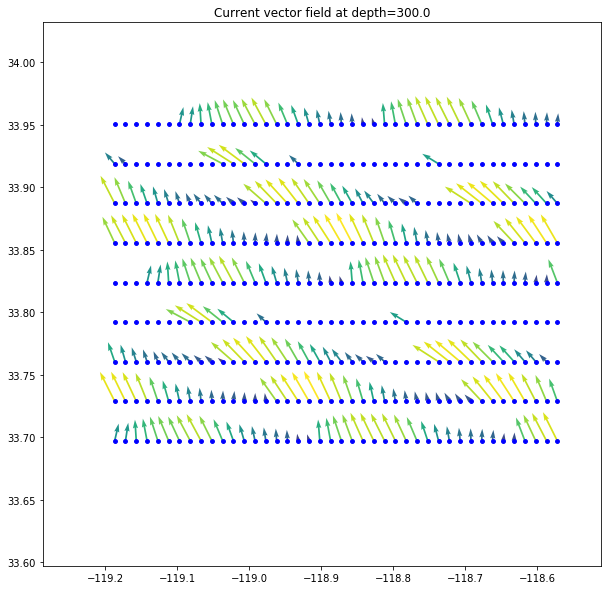

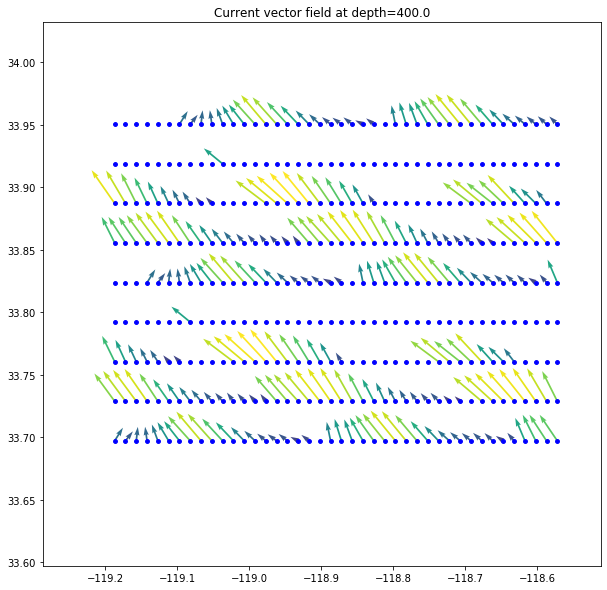

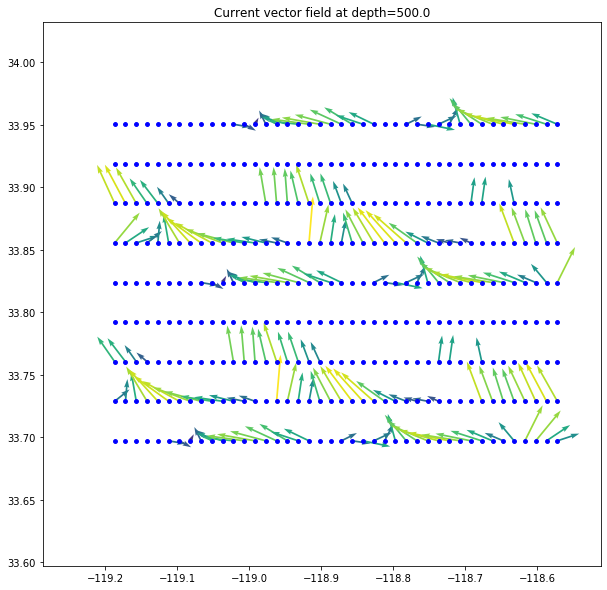

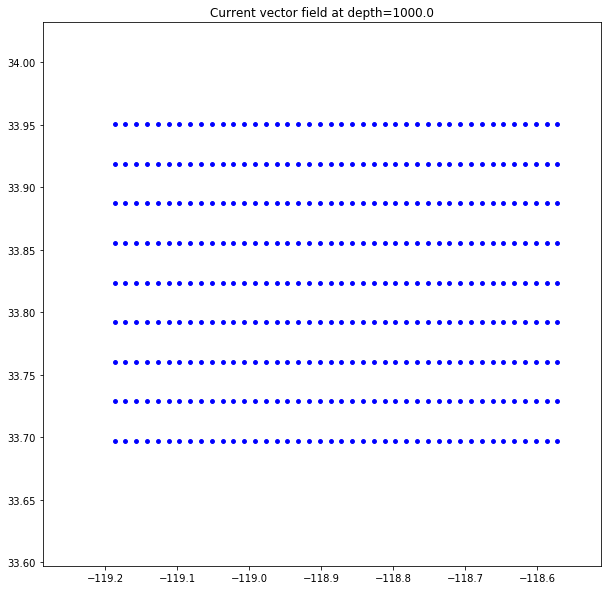

In [151]:
visualize_currents(oxnard, santamonica, longbeach, longbeach_100)

In [ ]:
##Then need to figure out how to export this information for ROS to use

